<a href="https://colab.research.google.com/github/luan3642/T4---KNN---PCA/blob/main/MNIST_kNN_LinearClassifier_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Carregamento e Normalização dos Dados

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Carregar MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype('int')

# Normalizar os dados (padronização com média 0 e desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. Divisão Treino/Validação/Teste (sem PCA)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir dados escalados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## 3. Modelos sem PCA: kNN e Regressão Logística

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# kNN testando com vários modelos diferentes

# Exemplo adaptado para “sem PCA”:
modelos = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
resultados_knn_sem_pca = []

for metrica in modelos:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metrica)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    resultados_knn_sem_pca.append((metrica, acc))
    print(f"kNN sem PCA (métrica={metrica}) – Acurácia validação: {acc:.4f}")


kNN sem PCA (métrica=euclidean) – Acurácia validação: 0.9432
kNN sem PCA (métrica=manhattan) – Acurácia validação: 0.9574
kNN sem PCA (métrica=chebyshev) – Acurácia validação: 0.7543
kNN sem PCA (métrica=minkowski) – Acurácia validação: 0.9432
kNN sem PCA (métrica=cosine) – Acurácia validação: 0.9424


## 4. Aplicando PCA

In [ ]:
from sklearn.decomposition import PCA

# Reduzir para 50 componentes principais
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

## 5. Divisão Treino/Validação/Teste (com PCA)

In [ ]:
# Dividir dados reduzidos com PCA
X_train_pca, X_temp_pca, y_train, y_temp = train_test_split(X_pca, y, test_size=0.4, random_state=42)
X_val_pca, X_test_pca, y_val, y_test = train_test_split(X_temp_pca, y_temp, test_size=0.5)

## 6. Modelos com PCA: kNN e Regressão Logística

In [ ]:
# kNN com PCA
resultados_knn = []

modelos = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']

for x in modelos:
  knn_pca = KNeighborsClassifier(n_neighbors=3, metric=x)
  knn_pca.fit(X_train_pca, y_train)
  y_pred_knn_pca = knn_pca.predict(X_val_pca)

  acc_knn_pca = accuracy_score(y_val, y_pred_knn_pca)
  resultados_knn.append((x, acc_knn_pca))

  print(f"kNN com PCA (metric= {x}) -- acuracia com pca {acc_knn_pca}")

# Regressão Logística com PCA
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
acc_lr_pca = lr_pca.score(X_val_pca, y_val)
print("Regressão Logística com PCA - Acurácia validação:", acc_lr_pca)

kNN com PCA (metric= euclidean) -- acuracia com pca 0.9588571428571429
kNN com PCA (metric= manhattan) -- acuracia com pca 0.9561428571428572
kNN com PCA (metric= chebyshev) -- acuracia com pca 0.9451428571428572
kNN com PCA (metric= minkowski) -- acuracia com pca 0.9588571428571429
kNN com PCA (metric= cosine) -- acuracia com pca 0.9560714285714286
Regressão Logística com PCA - Acurácia validação: 0.9067857142857143


##7. Testar diferentes proporções de divisão dos conjuntos

In [ ]:
def dividir_e_treinar(proporcao_treino):
    # proporcao_treino pode ser exemplo: 0.7 (então restará 0.3 para temp)
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=1 - proporcao_treino, random_state=42)
    # se proporcao_treino=0.7, X_temp tem 30%; vamos dividir em metade para val e metade para teste
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    # Treinamento sem PCA
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn.fit(X_train, y_train)
    acc_knn = accuracy_score(y_val, knn.predict(X_val))
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    acc_lr = lr.score(X_val, y_val)
    print(f"Sem PCA → Treino: {proporcao_treino*100:.0f}% | kNN: {acc_knn:.4f} | LR: {acc_lr:.4f}")
    # Agora PCA
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y, test_size=1 - proporcao_treino, random_state=42)
    X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=42)
    knn_pca = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn_pca.fit(X_train_pca, y_train_pca)
    acc_knn_pca = accuracy_score(y_val_pca, knn_pca.predict(X_val_pca))
    lr_pca = LogisticRegression(max_iter=1000)
    lr_pca.fit(X_train_pca, y_train_pca)
    acc_lr_pca = lr_pca.score(X_val_pca, y_val_pca)
    print(f"Com PCA → Treino: {proporcao_treino*100:.0f}% | kNN: {acc_knn_pca:.4f} | LR: {acc_lr_pca:.4f}\\n")


## 8. Gerando gráficos com Matplotlib

---



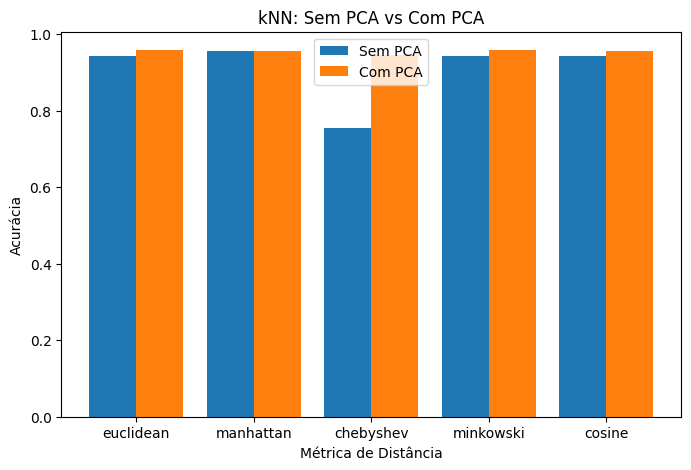

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você já tenha as listas preenchidas:
# resultados_knn_sem_pca = [('euclidean', 0.96), ('manhattan', 0.95), ...]
# resultados_knn_com_pca = [('euclidean', 0.93), ('manhattan', 0.92), ...]

metricas, accs_sem_pca = zip(*resultados_knn_sem_pca)
_, accs_com_pca = zip(*resultados_knn)

x = range(len(metricas))
plt.figure(figsize=(8, 5))
plt.bar([i - 0.2 for i in x], accs_sem_pca, width=0.4, label='Sem PCA')
plt.bar([i + 0.2 for i in x], accs_com_pca, width=0.4, label='Com PCA')
plt.xticks(x, metricas)
plt.ylabel('Acurácia')
plt.xlabel('Métrica de Distância')
plt.title('kNN: Sem PCA vs Com PCA')
plt.legend()
plt.show()


In [ ]:
print(len(resultados_knn_sem_pca), len(resultados_knn))


5 5
